In [53]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tools.utils import *
%matplotlib inline

(375, 1242, 3)


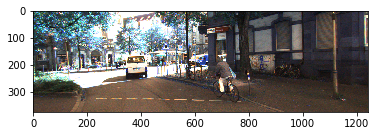

In [54]:
path = '/home/KITTI_Tutorial/data/2011_09_26/2011_09_26_drive_0005_sync/'
path =  '/home/kk/Downloads/2011_09_26_drive_0005_sync/2011_09_26/2011_09_26_drive_0005_sync/'
v2c_filepath = '/home/KITTI_Tutorial/data/2011_09_26/calib_velo_to_cam.txt'
c2c_filepath = '/home/KITTI_Tutorial/data/2011_09_26/calib_cam_to_cam.txt'
v2c_filepath = '/home/kk/Downloads/2011_09_26_calib/2011_09_26/calib_velo_to_cam.txt'
c2c_filepath = '/home/kk/Downloads/2011_09_26_calib/2011_09_26/calib_cam_to_cam.txt'

# bin file -> numpy array
velo_points = load_from_bin(path + 'velodyne_points/data/0000000030.bin')
velo_points_with_ref = load_from_bin_with_reflect(path + 'velodyne_points/data/0000000030.bin')

#read left camera image
image_type = 'color' # 'grayscale' or 'color' image
mode = '00' if image_type == 'grayscale' else '02' 

image = cv2.imread(path + 'image_'+ mode +'/data/0000000030.png')
width, height = image.shape[1], image.shape[0]

plt.imshow(image)
print(image.shape)

In [55]:
velo_points_with_ref_id = add_velo_points_array_with_id(velo_points_with_ref)

arr_2Dpoints_xyz_, c_ , arr_2Dpoints_xyzri_= velo3d_2_camera2d_points(velo_points_with_ref_id, v_fov=(-24.9, 2.0), h_fov=(-45,45), \
                               vc_path=v2c_filepath, cc_path=c2c_filepath, mode=mode)

dict_3Dpoints = getDict3DPoints(velo_points_with_ref_id)

# dict_2Dpoints # KEY = ID, VALUE = (X, Y) , all 2D points
dict_r_FOV = {}
dict_dist_FOV = {}
dict_2Dpoints_FOV = {} 
id_list = []
id_list = arr_2Dpoints_xyzri_[5]
for idx, iid in enumerate(id_list):
    dict_2Dpoints_FOV[iid] = list()
    dict_dist_FOV[iid] = list()
    dict_r_FOV[iid] = list()
    dict_2Dpoints_FOV[iid].append([arr_2Dpoints_xyzri_[0, idx], arr_2Dpoints_xyzri_[1, idx]])
    dict_dist_FOV[iid].append([dict_3Dpoints[iid][4]])
    #print([dict_3Dpoints[iid][3]])
    dict_r_FOV[iid].append([dict_3Dpoints[iid][3]]) 
    


dist_lim [57.214115  57.312313  57.666176  ...  4.3818727  4.4036036  4.422075 ]


In [56]:
# Let's put many box in boxes
boxes = []
boxes.append(BoundingBox('cyclist_bbox', 1, 662, 174, 104, 168, (10, 10)))    # cyclist_bbox
boxes.append(BoundingBox('pole_bbox', 1, 1085, 1, 77, 329, (10, 10)))         # pole_bbox 
boxes.append(BoundingBox('tree1_bbox', 1, 556, 2, 32, 252, (10, 10)))         # tree1_bbox
boxes.append(BoundingBox('tree2_bbox', 1, 155, 88, 33, 138, (10, 10)))        # tree2_bbox
boxes.append(BoundingBox('tree3_bbox', 1, 665, 2, 199, 241, (10, 10)))        # tree3_bbox

In [57]:
# Find points in bbox from all 2d points inside field of view
#  input: The box defined with BoundingBox class, dict_2Dpoints_FOV 
# output: List of boxes which include all box 
for inx, iid in enumerate(dict_2Dpoints_FOV):
    for box in boxes:
        p = dict_2Dpoints_FOV[iid][0] # [[x, y]], p = [x, y]
#         print(p)
#         print(type(p))
        if point_in_bbox_or_not(p, box):
                box._2DpointsId.append(iid)                

In [58]:
for i in boxes[1]._2DpointsId:
    print(int(i))

1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
7420
7421
7422
7423
7424
7425
7426
7427
7428
7429
7430
7431
7432
7433
7434
7435
7436
7437
7438
7439
7440
7441
9259
9260
9261
9262
9263
9264
9265
9266
9267
9268
9269
9270
9271
9272
9273
9274
9275
9276
9277
9278
9279
9280
9281
9282
11107
11108
11109
11110
11111
11112
11113
11114
11115
11116
11117
11118
11119
11120
11121
11122
11123
11124
11125
11126
11127
11128
11129
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
14705
14706
14707
14708
14709
14710
14711
14712
14713
14714
14715
14716
14717
14718
14719
14720
14721
14722
14723
14724
14725
14726
1

In [59]:
for i in range(len(boxes)):
    print(boxes[i].name, len(boxes[i]._2DpointsId))

cyclist_bbox 1584
pole_bbox 819
tree1_bbox 310
tree2_bbox 176
tree3_bbox 2039


In [66]:
for box in boxes:
    print(box)
print(boxes[0].)    

cyclist_bbox


In [39]:
# dict_2Dpoints_FOV_Box  key:id , value:(u, v) 
# dict_dist_FOV_Box, dict_r_FOV_Box, arr_2Dpoints_Box, arr_dist_Box, arr_r_Box

cnt = 0
dict_2Dpoints_FOV_Box = {}
dict_dist_FOV_Box = {}
dict_r_FOV_Box = {}
list_2Dpoints_Box = []
list_dist_Box     = []
list_r_Box        = []

for box in boxes:
    print(box)


for iid in boxes[0]._2DpointsId:
    #print(iid)
    cnt = cnt + 1
    dict_2Dpoints_FOV_Box[int(iid)] = dict_2Dpoints_FOV[iid][0]
    dict_dist_FOV_Box[iid] = dict_dist_FOV[iid][0]
    dict_r_FOV_Box[iid] = dict_r_FOV[iid][0]
    
    list_2Dpoints_Box.append(dict_2Dpoints_FOV_Box[iid][0])
    list_dist_Box.append(dict_dist_FOV_Box[iid][0])
    list_r_Box.append(dict_r_FOV_Box[iid][0])

arr_2Dpoints_Box = np.array(list_2Dpoints_Box)
arr_dist_Box     = np.array(list_dist_Box)
arr_r_Box        = np.array(list_r_Box)     

print(len(arr_2Dpoints_Box))
#print(len(dict_r_FOV_Box))
#print(len(dict_dist_FOV_Box))
#print((dict_2Dpoints_FOV_Box))

n_points = len(arr_2Dpoints_Box)
print(n_points)

1584
1584


13087
[717.9675752997465, 174.01619817031377]
717
13088
[715.6389919138877, 174.0466876341389]
715
13089
[714.4651989594494, 174.07223354769957]
714
13090
[712.0945171003161, 174.10878888906387]
712
13091
[709.7463885385708, 174.1445844535455]
709
13092
[707.3749447170443, 174.2142488439651]
707
13093
[705.0681968266764, 174.19190496368898]
705
13094
[702.7263258310234, 174.25474072916273]
702
13095
[700.3571133717332, 174.30318541886277]
700
13096
[696.8488692732054, 174.41968157619633]
696
13097
[694.505223106416, 174.52415615772645]
694
13098
[692.1344819321023, 174.6600675412008]
692
13099
[689.7816159294374, 174.8372787291048]
689
13100
[687.5225845131731, 174.4455961661938]
687
13101
[685.2242540466274, 174.39887041947452]
685
13102
[684.0745516549637, 174.40570394124478]
684
13103
[681.7438945214641, 174.34734631814914]
681
13104
[679.4410858112618, 174.31996271581153]
679
13105
[677.1157402345306, 174.3155109989018]
677
13106
[674.8003687909701, 174.3260850800765]
674
13107
[67

[691.9639680121811, 208.69130910002184]
691
34055
[689.6501786033831, 208.66506896886224]
689
34056
[687.2447536877604, 208.70200457059087]
687
34057
[686.0775574888424, 208.824687765034]
686
34058
[683.7299894603439, 208.87454902424477]
683
34059
[681.2765812901619, 208.8803708637442]
681
34060
[679.1743981710983, 223.8159532375625]
679
34061
[676.8581850075761, 223.85130245621076]
676
34062
[674.555615190714, 223.86142887721633]
674
34063
[672.2476503731092, 223.87169352548858]
672
34064
[671.0701193031753, 223.89597972928814]
671
34065
[668.7607070833888, 223.91645267819843]
668
34066
[666.4487687707001, 223.93450724723252]
666
34067
[664.1374576982124, 223.93419164059037]
664
36090
[764.2010556461582, 227.30490128476103]
764
36091
[761.8086767382929, 227.3052325050698]
761
36092
[760.5842785564581, 227.33167600923034]
760
36093
[758.175072553677, 227.32942000408724]
758
36094
[755.7718387949485, 227.33343221514497]
755
36095
[753.3995891287037, 227.2577387575371]
753
36096
[750.989

56830
[713.3597336147731, 259.0585305374292]
713
56831
[711.0072770796213, 259.09013453925513]
711
56832
[708.5302098003503, 259.09111257812515]
708
56833
[707.3227301435951, 259.20494529419966]
707
56834
[704.8943623198586, 259.2258422460566]
704
56835
[702.4768422697267, 259.15031387055586]
702
56836
[700.1102853121354, 259.2170517522002]
700
56837
[697.694543243426, 259.21770017931385]
697
56838
[695.291430399266, 259.31931080787416]
695
56839
[692.8988416543193, 259.4154642180834]
692
56840
[691.6963431201798, 259.5459716571876]
691
56841
[687.5929959019343, 267.63010085179286]
687
56842
[685.2456898436104, 267.64742372555065]
685
56843
[682.8841273831486, 267.6768175056446]
682
56844
[680.4957992523933, 267.6774887605836]
680
56845
[678.1731683754828, 267.60016946266734]
678
56846
[675.7929578965212, 267.67199680648287]
675
56847
[674.6466149599324, 267.60610716342035]
674
56848
[672.3485599558645, 267.4761160531052]
672
56849
[669.9966553474726, 267.4379415805101]
669
56850
[667.

<Figure size 576x432 with 0 Axes>

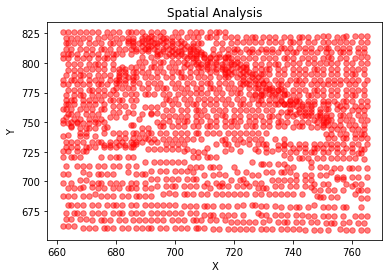

<Figure size 576x432 with 0 Axes>

In [40]:
# x-y scatter of box

cnt = 0
list_x = []
list_y = []
list_cnt = []
for iid in boxes[0]._2DpointsId:
    iid = int(iid)
    print(iid)
    print(dict_2Dpoints_FOV_Box[iid])
    x = np.int32(dict_2Dpoints_FOV_Box[iid][0])
    y = np.int32(dict_2Dpoints_FOV_Box[iid][1])
    print(x)
    list_x.append(x)
    list_y.append(y)
    cnt = cnt + 1
    list_cnt.append(cnt)
    #print(cnt)

arr_x = np.array(list_x)
arr_y = np.array(list_y)
arr_cnt = np.array(list_cnt)

print(arr_x.shape)
print(arr_x[10])
print(arr_cnt.shape)
plt.scatter(arr_x[:], 1000 - arr_y[:], s=30, c='red',marker='o',alpha=0.5,label='C1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spatial Analysis')
plt.figure(figsize=(8,6))

BoundingBox(ixmin=1085, ixmax=1162, iymin=1, iymax=330)
(329, 77)
<bound method BoundingBox.as_artist of BoundingBox(ixmin=1085, ixmax=1162, iymin=1, iymax=330)>


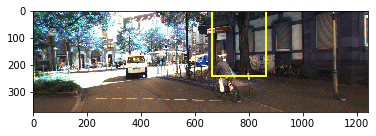

In [22]:
# Show box on the image

# load bbox [x ,y, w, h]
from photutils import BoundingBox
pole_bbox=BoundingBox(1085, 1085+77,1, 1+329)
tree1_bbox=BoundingBox(556, 556+32, 2, 2+252)
cyclist_bbox=BoundingBox(662, 662+104, 174, 174+168)
tree2_bbox=BoundingBox(155, 155+33, 88, 88+138)
tree3_bbox=BoundingBox(665, 864, 2, 243) 
print(pole_bbox)
print(pole_bbox.shape) # h, w
print(pole_bbox.as_artist) 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.imshow(image)
# ax.add_patch(pole_bbox.as_artist(facecolor='none', edgecolor='yellow', lw=2.))
# ax.add_patch(tree1_bbox.as_artist(facecolor='none', edgecolor='yellow', lw=2.))
# ax.add_patch(cyclist_bbox.as_artist(facecolor='none', edgecolor='yellow', lw=2.))
# ax.add_patch(tree2_bbox.as_artist(facecolor='none', edgecolor='yellow', lw=2.))

ax.add_patch(tree3_bbox.as_artist(facecolor='none', edgecolor='yellow', lw=2.))